In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('survey_results_public.csv')

In [3]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [4]:
g_df = df[['Country', 'Employment', 'ConvertedCompYearly', 'YearsCodePro', 'EdLevel']]
g_df = g_df.rename({'ConvertedCompYearly' : 'SalaryByYearly'}, axis=1)
g_df.head()

,Country,Employment,SalaryByYearly,YearsCodePro,EdLevel
0,United States of America,"Employed, full-time",NaN,NaN,Primary/elementary school
1,United Kingdom of Great Britain and Northern I...,"Employed, full-time",NaN,17,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
2,United Kingdom of Great Britain and Northern I...,"Employed, full-time",NaN,27,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
3,Canada,"Student, full-time",NaN,NaN,Some college/university study without earning ...
4,Norway,"Student, full-time",NaN,NaN,"Secondary school (e.g. American high school, G..."


In [5]:
g_df= g_df[g_df['SalaryByYearly'].notnull()]
g_df.head()

,Country,Employment,SalaryByYearly,YearsCodePro,EdLevel
72,Pakistan,"Employed, full-time;Student, full-time;Indepen...",7322.0,1,"Secondary school (e.g. American high school, G..."
374,Austria,"Employed, full-time",30074.0,6,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)"
379,Turkey,"Employed, full-time",91295.0,6,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
385,France,"Independent contractor, freelancer, or self-em...",53703.0,17,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
389,United States of America,"Employed, full-time;Student, part-time",110000.0,7,Some college/university study without earning ...


In [6]:
gf = g_df

In [7]:
gf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         23435 non-null  object 
 1   Employment      23435 non-null  object 
 2   SalaryByYearly  23435 non-null  float64
 3   YearsCodePro    23345 non-null  object 
 4   EdLevel         23435 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [8]:
gf= gf.dropna()
gf.isnull().sum()

Country           0
Employment        0
SalaryByYearly    0
YearsCodePro      0
EdLevel           0
dtype: int64

In [9]:
gf = gf[gf['Employment'] == 'Employed, full-time']
gf = gf.drop('Employment', axis=1)
gf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17527 entries, 374 to 41185
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         17527 non-null  object 
 1   SalaryByYearly  17527 non-null  float64
 2   YearsCodePro    17527 non-null  object 
 3   EdLevel         17527 non-null  object 
dtypes: float64(1), object(3)
memory usage: 684.6+ KB


In [10]:
gf['Country'].value_counts()

Country
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
                                                        ... 
Botswana                                                   1
Barbados                                                   1
Senegal                                                    1
Suriname                                                   1
Mali                                                       1
Name: count, Length: 155, dtype: int64

In [11]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [12]:
country_map = shorten_categories(gf['Country'].value_counts(), 400)
gf['Country'] = gf['Country'].map(country_map)
gf.Country.value_counts()

Country
Other                                                   5628
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
France                                                   719
Canada                                                   684
Brazil                                                   457
Spain                                                    431
Italy                                                    414
Netherlands                                              406
Australia                                                400
Name: count, dtype: int64

In [13]:
gf['Salary'] = gf['SalaryByYearly']/12
gf.head()

,Country,SalaryByYearly,YearsCodePro,EdLevel,Salary
374,Other,30074.0,6,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2506.166667
379,Other,91295.0,6,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7607.916667
392,United Kingdom of Great Britain and Northern I...,161044.0,18,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",13420.333333
395,United Kingdom of Great Britain and Northern I...,121018.0,25,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10084.833333
398,United States of America,195000.0,30,Some college/university study without earning ...,16250.000000


In [14]:
import matplotlib.pyplot as plt

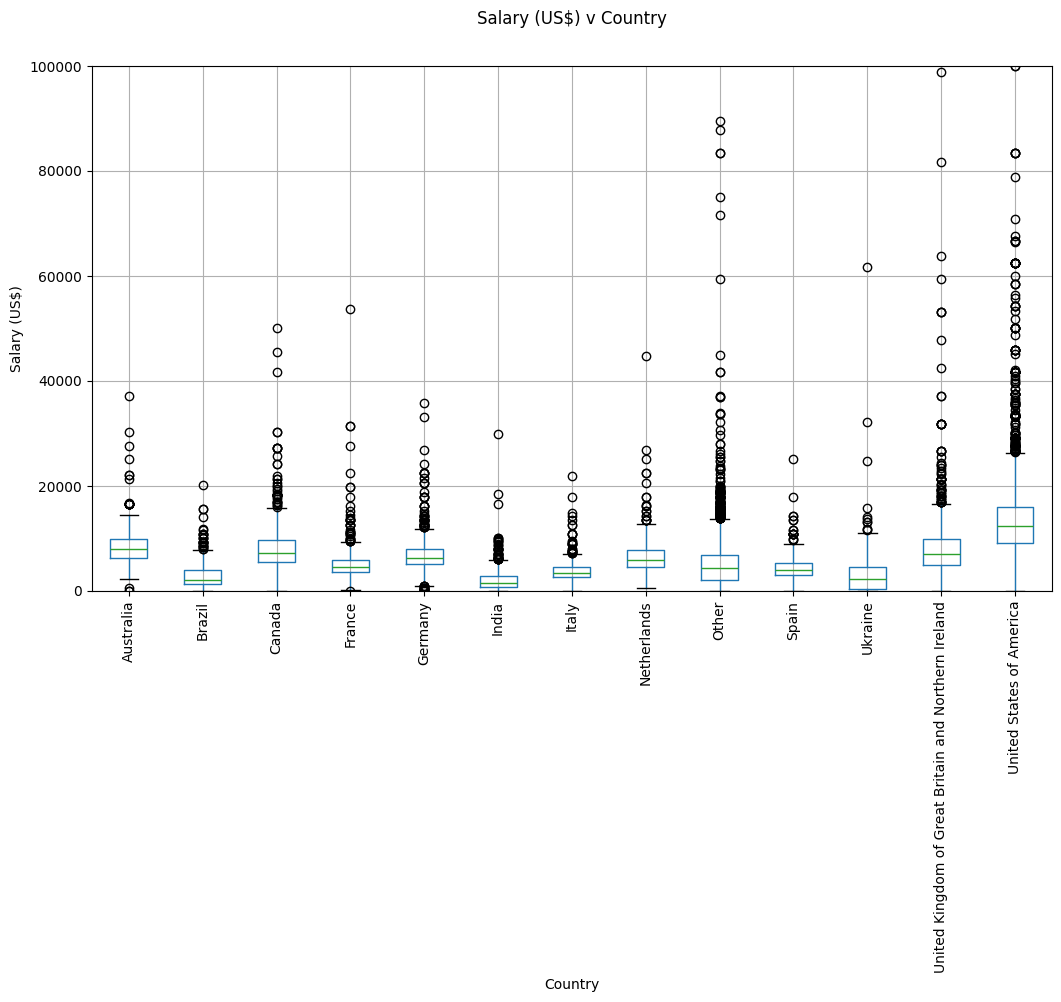

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
gf.boxplot('Salary', 'Country', ax=ax)
ax.set_ylim(0, 100000)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary (US$)')
plt.xticks(rotation=90)
plt.show()

In [16]:
gf = gf[gf["Salary"] <= 80000]
gf = gf[gf["Salary"] >= 5000 ]
gf = gf[gf['Country'] != 'Other']

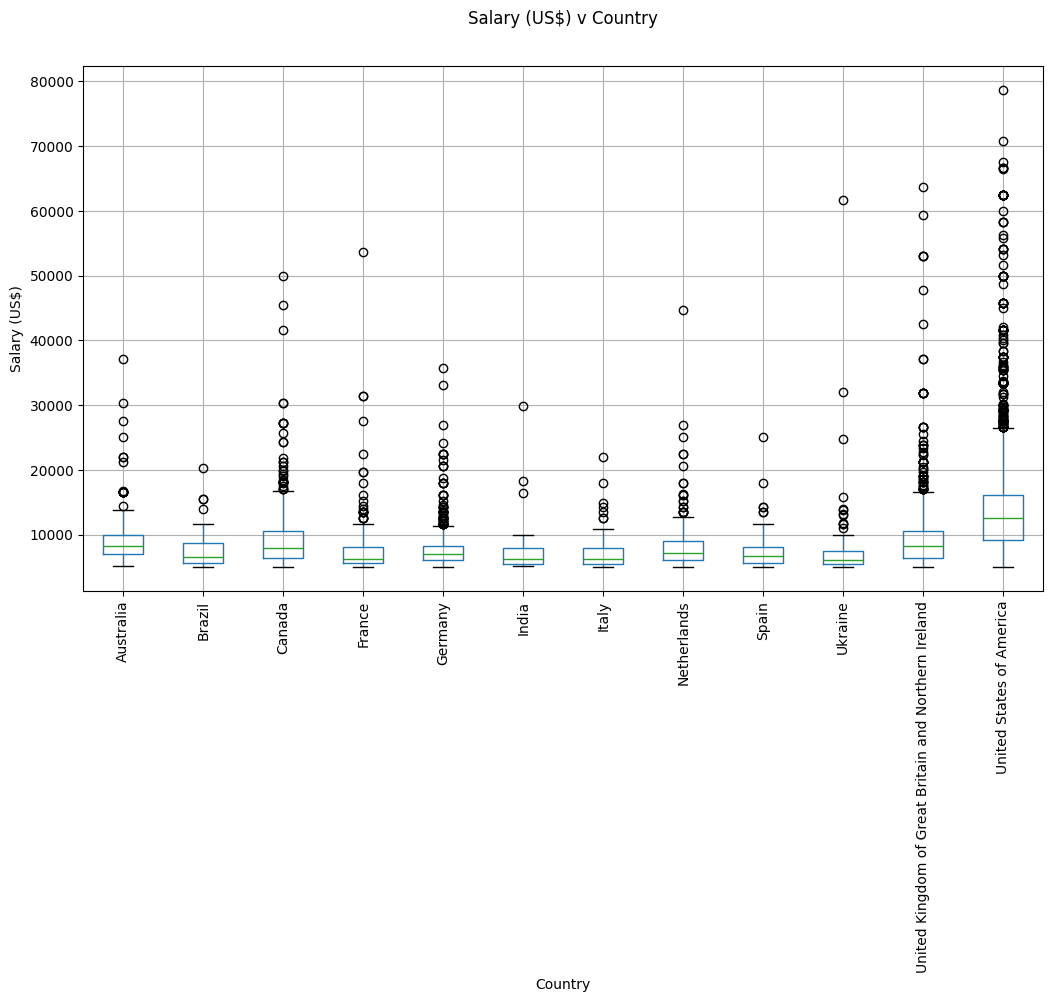

In [17]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
gf.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary (US$)')
plt.xticks(rotation=90)
plt.show()

In [18]:
gf['YearsCodePro'].unique()

array(['18', '25', '30', '27', '15', '11', '23', '17', '10', '24', '26',
       '40', '4', '9', '22', '20', '16', '13', '19', '12', '35', '5',
       '31', '7', '41', '36', '6', '14', '3', '1', '2', '8', '32', '28',
       '38', 'Less than 1 year', '21', '34', '29', '43', '33', '45',
       'More than 50 years', '37', '44', '42', '39', '46', '49', '48',
       '50'], dtype=object)

In [19]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

gf['YearsCodePro'] = gf['YearsCodePro'].apply(clean_experience)

In [20]:
df['EdLevel'].unique()

array(['Primary/elementary school',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else', nan],
      dtype=object)

In [21]:
def clean_education(x):
    if 'Bachelor' in x:
        return 'Bachelor\'s degree'
    if 'Master' in x:
        return 'Master\'s degree'
    if 'Professional' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

gf['EdLevel'] = gf['EdLevel'].apply(clean_education)

In [22]:
gf["EdLevel"].unique()

array(['Post grad', "Master's degree", 'Less than a Bachelors',
       "Bachelor's degree"], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le_education = LabelEncoder()
gf['EdLevel'] = le_education.fit_transform(gf['EdLevel'])
gf["EdLevel"].unique()
#le.classes_

array([3, 2, 1, 0])

In [25]:
le_country = LabelEncoder()
gf['Country'] = le_country.fit_transform(gf['Country'])
gf["Country"].unique()

array([10, 11,  4,  2,  3,  9,  6,  8,  7,  1,  5,  0])

In [26]:
X = gf.drop(['Salary', 'SalaryByYearly'], axis=1)
y = gf['Salary']

In [27]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [28]:
y_pred = linear_reg.predict(X)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [30]:
print("${:.02f}".format(error))

$6251.16


In [31]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [32]:
y_pred = dec_tree_reg.predict(X)

In [33]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:.02f}".format(error))

$5504.41


In [34]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [35]:
y_pred = random_forest_reg.predict(X)

In [36]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:.02f}".format(error))

$5521.14


In [37]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [38]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)

error = np.sqrt(mean_squared_error(y, y_pred))
print("${:.02f}".format(error))

$5852.82


In [39]:
X

,Country,YearsCodePro,EdLevel
392,10,18.0,3
395,10,25.0,2
398,11,30.0,1
414,10,27.0,0
424,4,30.0,2
...,...,...,...
41163,11,2.0,0
41164,11,13.0,0
41167,11,25.0,1
41184,11,30.0,2


In [40]:
x_test = np.array([["Ukraine", "Master\'s degree", 10]])
x_test

array([['Ukraine', "Master's degree", '10']], dtype='<U21')

In [41]:
x_test[:, 0] = le_country.transform(x_test[:,0])
x_test[:, 1] = le_education.transform(x_test[:,1])
x_test = x_test.astype(float)
x_test

array([[ 9.,  2., 10.]])

In [42]:
import warnings

# Ignorer tous les avertissements
warnings.filterwarnings("ignore")

In [43]:
y_test_pred = regressor.predict(x_test)

# Formater chaque valeur prédite individuellement
formatted_predictions = ["${:.02f}".format(pred) for pred in y_test_pred]

print(formatted_predictions)


['$7108.16']


In [44]:
import pickle

In [45]:
data = {"model" : regressor, "le_country" : le_country, "le_education" : le_education}

with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [46]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [47]:
y_test_pred = regressor_loaded.predict(x_test)
y_test_pred

array([7108.16086498])